# load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# load Data

In [2]:
import zipfile
import os

zip_path = '/content/archive.zip'
extract_path = '/content/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"File extracted to: {extract_path}")

File extracted to: /content/


In [3]:
df = pd.read_csv('/content/Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.sample(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
27,28,240.1,16.7,22.9,15.9
152,153,197.6,23.3,14.2,16.6
146,147,240.1,7.3,8.7,13.2
194,195,149.7,35.6,6.0,17.3
88,89,88.3,25.5,73.4,12.9


In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


## Data preparation

In [7]:
df = df.drop('Unnamed: 0', axis=1)
print("Missing values after dropping 'Unnamed: 0':")
display(df.isnull().sum())
print("\nFirst few rows of the cleaned DataFrame:")
display(df.head())

Missing values after dropping 'Unnamed: 0':


,0
TV,0
Radio,0
Newspaper,0
Sales,0



First few rows of the cleaned DataFrame:


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Data analysis and visualization

In [8]:
display(df.describe())

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


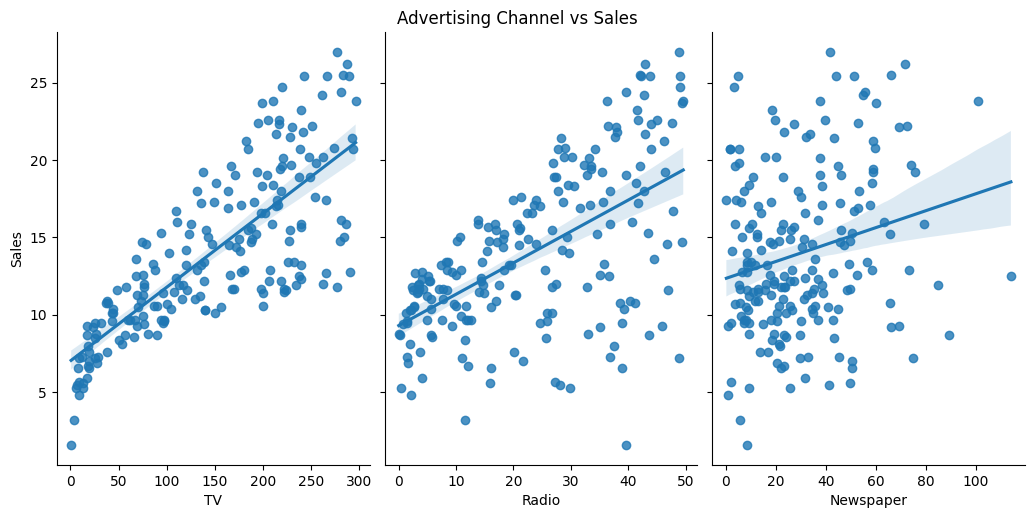

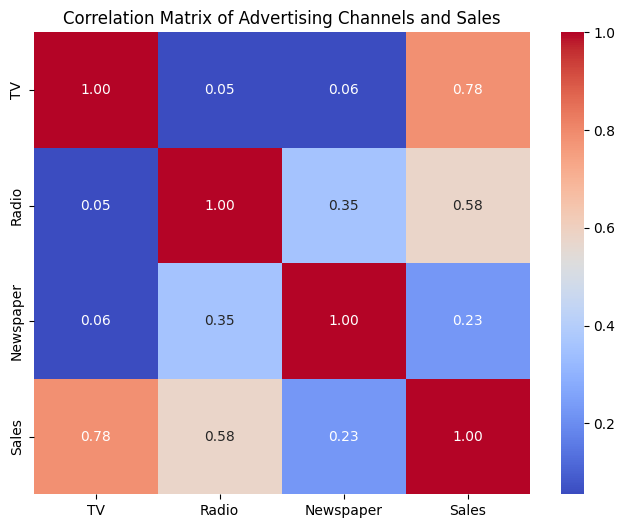

In [9]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.7, kind='reg')
plt.suptitle('Advertising Channel vs Sales', y=1.02)
plt.show()

correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Advertising Channels and Sales')
plt.show()

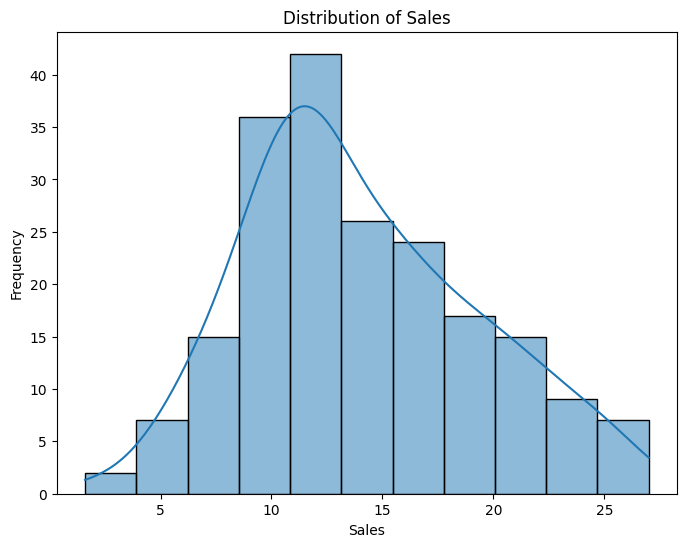

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

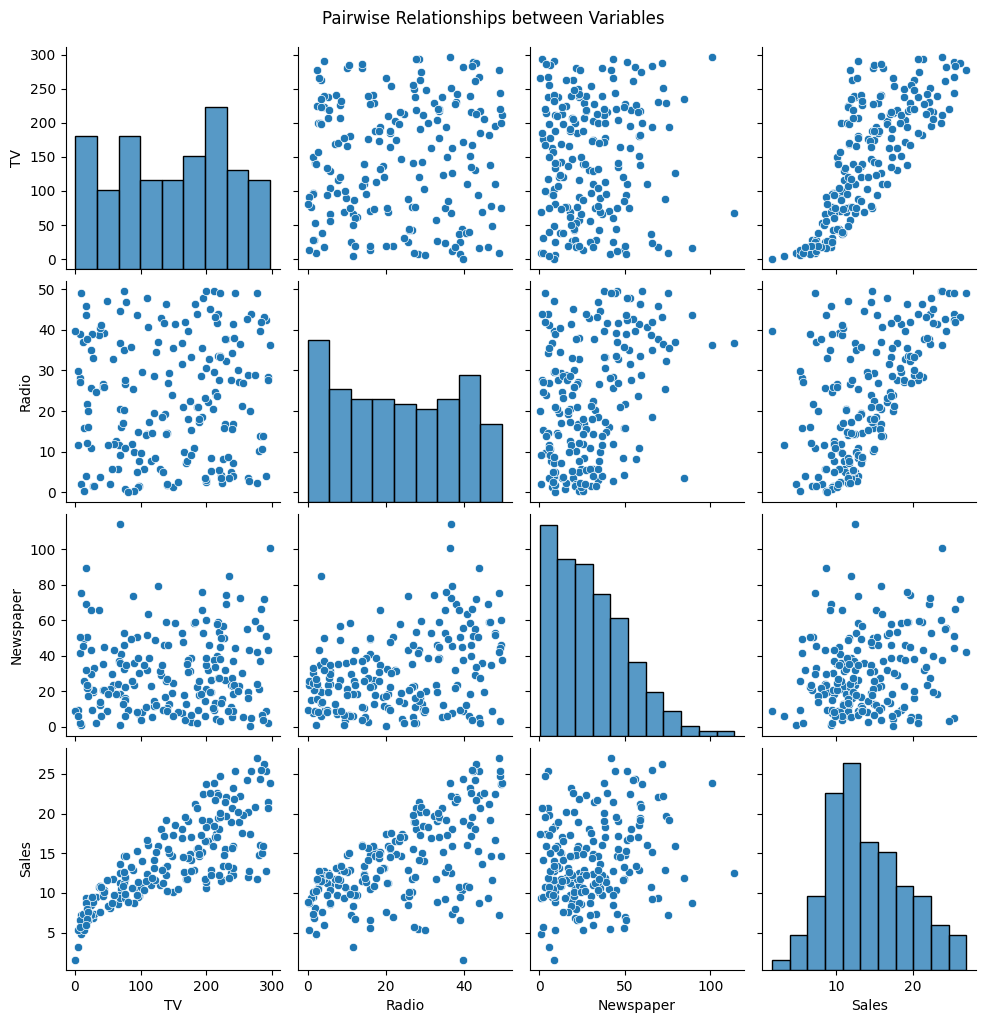

In [11]:
sns.pairplot(df)
plt.suptitle('Pairwise Relationships between Variables', y=1.02)
plt.show()

## Model building

In [12]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso()
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    print(f"\nEvaluation for {name} on Test Set:")
    print(f"Mean Squared Error (MSE): {mse_test:.2f}")
    print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
    print(f"R-squared (R2 ): {r2_test:.2f}")

    print(f"\nEvaluation for {name} on Training Set:")
    print(f"Mean Squared Error (MSE): {mse_train:.2f}")
    print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
    print(f"R-squared (R2 ): {r2_train:.2f}")
    print("-" * 30)

Training Linear Regression...

Evaluation for Linear Regression on Test Set:
Mean Squared Error (MSE): 3.17
Mean Absolute Error (MAE): 1.46
R-squared (R2 ): 0.90

Evaluation for Linear Regression on Training Set:
Mean Squared Error (MSE): 2.71
Mean Absolute Error (MAE): 1.20
R-squared (R2 ): 0.90
------------------------------
Training Ridge Regression...

Evaluation for Ridge Regression on Test Set:
Mean Squared Error (MSE): 3.17
Mean Absolute Error (MAE): 1.46
R-squared (R2 ): 0.90

Evaluation for Ridge Regression on Training Set:
Mean Squared Error (MSE): 2.71
Mean Absolute Error (MAE): 1.20
R-squared (R2 ): 0.90
------------------------------
Training Lasso Regression...

Evaluation for Lasso Regression on Test Set:
Mean Squared Error (MSE): 3.14
Mean Absolute Error (MAE): 1.45
R-squared (R2 ): 0.90

Evaluation for Lasso Regression on Training Set:
Mean Squared Error (MSE): 2.71
Mean Absolute Error (MAE): 1.20
R-squared (R2 ): 0.90
------------------------------


In [16]:
from sklearn.ensemble import RandomForestRegressor

# Train a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances from Random Forest Model:")
display(importance_df)

print("\nActionable Insights for Business Marketing Strategies:")
print("Based on the feature importances:")
print(f"- {importance_df.iloc[0]['Feature']} advertising has the highest impact on sales (Importance: {importance_df.iloc[0]['Importance']:.4f}).")
print(f"- {importance_df.iloc[1]['Feature']} advertising has a moderate impact on sales (Importance: {importance_df.iloc[1]['Importance']:.4f}).")
print(f"- {importance_df.iloc[2]['Feature']} advertising has the lowest impact on sales (Importance: {importance_df.iloc[2]['Importance']:.4f}).")
print("\nRecommendations:")
print(f"1. Continue to invest heavily in {importance_df.iloc[0]['Feature']} advertising, as it appears to be the most effective channel for driving sales.")
print(f"2. Maintain or slightly increase investment in {importance_df.iloc[1]['Feature']} advertising, given its moderate impact.")
print(f"3. Re-evaluate the effectiveness of {importance_df.iloc[2]['Feature']} advertising. Consider shifting some budget from {importance_df.iloc[2]['Feature']} to {importance_df.iloc[0]['Feature']} or {importance_df.iloc[1]['Feature']}, or explore alternative channels if ROI is low.")
print("4. Continuously monitor the performance of each channel and adjust budget allocation based on results.")

Feature Importances from Random Forest Model:


,Feature,Importance
0,TV,0.624810
1,Radio,0.362201
2,Newspaper,0.012989



Actionable Insights for Business Marketing Strategies:
Based on the feature importances:
- TV advertising has the highest impact on sales (Importance: 0.6248).
- Radio advertising has a moderate impact on sales (Importance: 0.3622).
- Newspaper advertising has the lowest impact on sales (Importance: 0.0130).

Recommendations:
1. Continue to invest heavily in TV advertising, as it appears to be the most effective channel for driving sales.
2. Maintain or slightly increase investment in Radio advertising, given its moderate impact.
3. Re-evaluate the effectiveness of Newspaper advertising. Consider shifting some budget from Newspaper to TV or Radio, or explore alternative channels if ROI is low.
4. Continuously monitor the performance of each channel and adjust budget allocation based on results.


## Executive Summary

This project aimed to predict future sales based on advertising spend across different channels (TV, Radio, and Newspaper) and provide actionable insights for marketing strategies.

**Key Findings:**

*   Data analysis showed a strong positive correlation between TV advertising spend and Sales, a moderate positive correlation with Radio advertising spend, and a weak correlation with Newspaper advertising spend.
*   Multiple regression models (Linear Regression, Ridge, Lasso, and Random Forest) were trained and evaluated. The Random Forest model demonstrated good performance in predicting sales.
*   أشارت أهمية الميزات من نموذج الغابة العشوائية إلى أن إعلانات التلفزيون هي الأكثر تأثيرًا على المبيعات، تليها إعلانات الراديو، بينما كان لإعلانات الصحف التأثير الأقل.
*   Feature importances from the Random Forest model indicated that TV advertising has the highest impact on sales, followed by Radio advertising, while Newspaper advertising had the least impact.

**Actionable Recommendations:**

*   Continue to invest heavily in TV advertising due to its high impact on sales.
*   Maintain or slightly increase investment in Radio advertising given its moderate impact.
*   It is recommended to re-evaluate the effectiveness of Newspaper advertising. Consider shifting part of the Newspaper advertising budget to more effective channels like TV or Radio, or explore alternative digital marketing channels if the return on investment from Newspaper is low.
*   Continuously monitor the performance of each advertising channel and adjust budget allocation based on results to ensure maximum return on investment.

In summary, this analysis suggests that focusing on TV and Radio advertising is most effective for increasing sales, with a need to review investment in Newspaper advertising.

## Actionable Recommendations:

*   Continue to invest heavily in TV advertising due to its high impact on sales.
*   Maintain or slightly increase investment in Radio advertising given its moderate impact.
*   It is recommended to re-evaluate the effectiveness of Newspaper advertising. Consider shifting part of the Newspaper advertising budget to more effective channels like TV or Radio, or explore alternative digital marketing channels if the return on investment from Newspaper is low.
*   Continuously monitor the performance of each advertising channel and adjust budget allocation based on results to ensure maximum return on investment.